# Long-term goals
Goals for today:
* Generate some random networks
* Learn to visualize networks (for troubleshooting)
    * We may have to transform our graph to "feed it" to the visualizer
* Generate simple network statistics (degree distribution)


In [67]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

A graph of 7 nodes:
0:[1, 2]
1:[0]
2:[0]
3:[4]
4:[3, 5]
5:[4]
7:[]

Nodes: [0, 1, 2, 3, 4, 5, 7]
Edges: [(0, 1), (0, 2), (3, 4), (4, 5)]


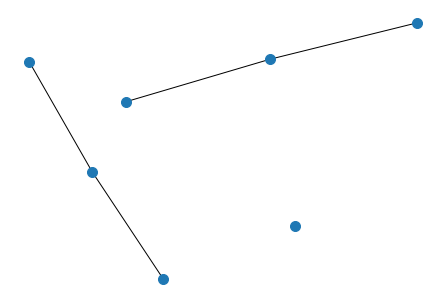

In [68]:
class Graph():
    def __init__(self):
        self.gdict = {}
        
    def add_node(self, node):
        """If node is not in a dictionary, add it."""
        if node not in self.gdict:
            self.gdict[node] = []
    
    def add_edge(self, node1, node2):        
        self.add_node(node1)
        self.add_node(node2)
        # Add node2 as a connection for node1, and the other way around
        if node2 not in self.gdict[node1]:
            self.gdict[node1].append(node2)
        if node1 not in self.gdict[node2]:
            self.gdict[node2].append(node1)
            
    def nodes(self):
        """Returns a list of nodes."""
        return list(self.gdict.keys())
    
    def edges(self):
        """Returns a list of edges."""
        out = []
        for node,links in self.gdict.items():
            for link in links:
                if node<link:
                    out.append((node,link))
        return out
            
    def __str__(self):
        out = 'A graph of ' + str(len(self.gdict)) + ' nodes:\n'
        for node in self.gdict:
            out += str(node) + ':' + str(self.gdict[node]) + '\n'
        return out
    
    def plot(self):
        g_nx = nx.Graph()
        g_nx.add_nodes_from(self.nodes())
        g_nx.add_edges_from(self.edges())
        nx.draw_kamada_kawai(g_nx, node_size=100)
    
# Test
g = Graph()
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(3,4)
g.add_edge(4,5)
g.add_node(7)
print(g)
print('Nodes:',g.nodes())
print('Edges:',g.edges())
g.plot()

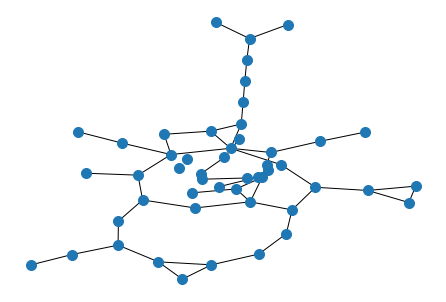

In [69]:
N_NODES = 50
N_EDGES = N_NODES

g = Graph()
for i in range(N_NODES):
    g.add_node(i)
edges = []
while len(edges)<N_EDGES:
    n1 = np.random.randint(low=0, high=N_NODES)
    n2 = np.random.randint(low=0, high=N_NODES)
    if n2<n1:
        n1,n2 = n2,n1
    
    if (n1,n2) not in edges and n1!=n2:
        g.add_edge(n1,n2)
        edges.append((n1,n2))
    
#print(g)

g.plot()

[0, 2, 0, 2, 2, 4, 2, 3, 1, 3, 5, 1, 1, 2, 3, 2, 3, 2, 2, 2, 0, 3, 1, 3, 0, 1, 1, 3, 1, 1, 3, 3, 3, 2, 2, 1, 3, 2, 2, 1, 1, 2, 3, 3, 2, 4, 2, 1, 1, 3]
[ 4. 13. 16. 14.  2.  1.]


Text(0, 0.5, 'Frequency')

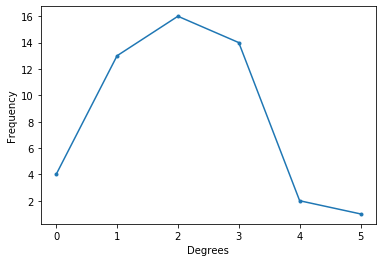

In [70]:
degrees = []
for node,links in g.gdict.items():
    degrees.append(len(links))

print(degrees)
hist = np.zeros(max(degrees)+1)
for degree in degrees:
    hist[degree] += 1
print(hist)

plt.plot(hist,'.-');
plt.xlabel('Degrees')
plt.ylabel('Frequency')

# A different way to create a random network:
* Add nodes one by one,
* As you add it, choose a node to connect it to, randomly
* Once the network is ready, compare its degrees distribution to that of the "Truly random" network (that was described in the lecture)

[0, 2, 0, 2, 2, 4, 2, 3, 1, 3, 5, 1, 1, 2, 3, 2, 3, 2, 2, 2, 0, 3, 1, 3, 0, 1, 1, 3, 1, 1, 3, 3, 3, 2, 2, 1, 3, 2, 2, 1, 1, 2, 3, 3, 2, 4, 2, 1, 1, 3, 1]
[ 4. 14. 16. 14.  2.  1.]


Text(0, 0.5, 'Frequency')

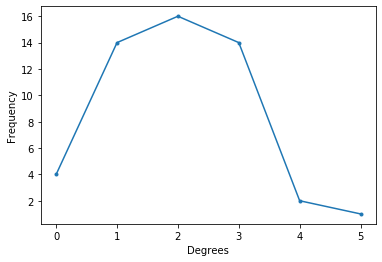

In [71]:
N_NODES = 50
N_EDGES = N_NODES

for i in range (0, N_NODES): 
    g.add_node(i)                           
    for i2 in range (0, N_NODES): 
        g.add_node(i2)
        if i!=i2:                   
            g.add_edge(N_NODES,N_NODES) 

    

degrees = []
for node,links in g.gdict.items():
    degrees.append(len(links))

print(degrees)
hist = np.zeros(max(degrees)+1)
for degree in degrees:
    hist[degree] += 1
print(hist)

plt.plot(hist,'.-');
plt.xlabel('Degrees')
plt.ylabel('Frequency')